## Words Scraping & Analysis

This analysis searches through pubmed for papers that mention specific ERPs. 

It then scrapes the titles, words, and years of all those papers such that this data can be used for further analysis. 

Here:
- Words analysis: scrapes for ERP papers, pulls out words in abstracts for analysis. 

In [1]:
%matplotlib inline

# Import ERPSC Code for Word Analysis
from erpsc.words import Words
from erpsc.erp_data_all import ERPDataAll
from erpsc.core.io import save_pickle_obj, load_pickle_obj
from erpsc.plts.wc import make_wc
from erpsc.plts.single import plot_years

## Setup

In [2]:
# Settings
CUR_DATA = 'load'               # 'load', 'file', 'test'
SAVE_FIG = False

In [3]:
# Initialize words-analysis object
words = Words()

In [4]:
# Add list of ERPs from file, and list of exclusion words
if CUR_DATA == 'file':

    words.set_erps_file()
    words.set_exclusions_file()
    
# OR: Set small set of ERPs and terms for tests    
elif CUR_DATA == 'test':
    
    erps = [['P180'], ['N240']]
    exc = [['protein', 'q21'], ['cancer', 'histone', 'cell']]

    words.set_erps(erps)
    words.set_exclusions(exc)

# Load from pickle file
elif CUR_DATA == 'load':
    
    words = load_pickle_obj('BaseScrape_words')

else: 
    raise ValueError('Data setting not understood.')

In [5]:
# If not loading, run the scrape
if CUR_DATA in ['file', 'test']:
    
    # Scrape word data for all ERP abstracts
    words.scrape_data(db='pubmed', retmax='5', use_hist=False)
    
    # Save pickle of word object
    #save_pickle_obj(words, 'test')

## Check Scrape Information

In [6]:
# Check database scrape info
words.db_info

{'menuname': 'PubMed',
 'dbname': 'pubmed',
 'dbbuild': 'Build170322-2207m.2',
 'count': '27035335',
 'lastupdate': '2017/03/23 07:24',
 'description': 'PubMed bibliographic record'}

In [7]:
# Check requester object info
words.req.check()

Requester object is active: 	 False
Number of requests sent: 	 383
Requester opened: 		 05:55 Thursday 23 March
Requester closed: 		 06:25 Thursday 23 March


# AAA

In [8]:
# Words to remove from common keywords
# ['erp', 'erps']

In [9]:
# Reload all data
for i in range(words.n_erps):
    words.results[i].load()

In [10]:
# Collect ERPs into list of aggragated data objects
all_dat = [ERPDataAll(words[erp]) for erp in words.result_keys]

In [11]:
all_dat[0].create_summary()
all_dat[0].print_summary()

P100 :
  Full name of this ERP is: 	 
  Number of articles: 		 1555
  First publication: 		 1976
  Most common author: 		 E Adachi-Usami
    number of publications: 	 26
  Most common journal: 		 Electroencephalography and clinical neurophysiology
    number of publications: 	 83 



In [12]:
# Check most common words
for erp_dat in all_dat:
    erp_dat.check_words(5)

P100  : visual , patients , latency , vep , amplitude , 
P150  : cells , expression , adhesion , patients , dynein , 
P180  : cells , dna , activity , polymerase , cd45 , 
P200  : p300 , patients , processing , amplitude , stimuli , 
P220  : cells , lymphocytes , cell , expression , de , 
P240  : amplitude , components , children , cells , left , 
P250  : components , processing , amplitude , task , subjects , 
P270  : stimuli , amplitude , stimulus , components , task , 
P300  : patients , amplitude , stimuli , subjects , latency , 
P3a   : stimuli , auditory , p3b , task , attention , 
P3b   : task , stimuli , processing , p3a , amplitude , 
P340  : pain , seps , results , protein , rangap1 , 
P350  : stimuli , components , processing , task , subjects , 
P400  : stimuli , amplitude , infants , faces , processing , 
P500  : two , p , different , group , study , 
P550  : subjects , sounds , task , group , larger , 
P600  : study , e7 , sl , language , sentence , 
N75   : visual , vep 

In [13]:
# Check most common keywords
for erp_dat in all_dat:
    erp_dat.check_kws(4)

P100  : visual evoked potentials , visual evoked potential , emotion , attention , 
P150  : pregabalin , aging , amino acids , metabolomics , 
P180  : transcranial magnetic stimulation , epilepsy , antiepileptic drug , pharmaco-tms-eeg , 
P200  : n400 , p300 , n170 , attention , 
P220  : complexity , fraser spiral illusion , illusion , shape perception , 
P240  : capsaicin , central sensitization , evoked potentials , pinprick , 
P250  : mlpa , velocardiofacial syndrome , cat eye syndrome , categorization learning , 
P270  : face , multimodal processing , n170 , p400 , 
P300  : attention , schizophrenia , working memory , frn , 
P3a   : attention , p300 , p3b , mismatch negativity , 
P3b   : p300 , attention , p3a , aging , 
P340  : ascorbic acid , auditory processing , late discriminative negativity (ldn) , mismatch negativity (mmn) , 
P350  : joint attention , eye gaze , social interaction , virtual reality , 
P400  : autism , infant , infancy , chromatin , 
P500  : asia , developing

## Summary

In [14]:
# Create and save summaries for all ERPs
for erp_dat in all_dat:
    erp_dat.create_summary()
    #erp_dat.print_summary()
    #erp_dat.save_summary()

## WordCloud Plots

In [15]:
ind = 8
print(all_dat[ind].label)

P300


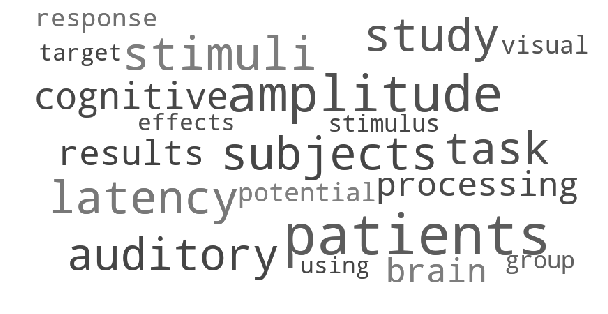

In [16]:
# Create a wordcloud
make_wc(all_dat[ind].word_freqs, 20, all_dat[ind].label, save_fig=True)

## Data Plots

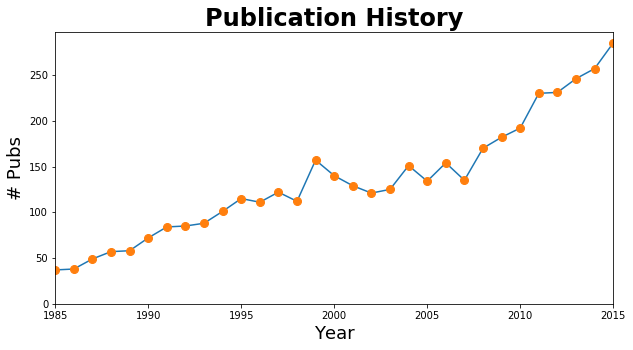

In [17]:
# Check an example history plot
plot_years(all_dat[ind].year_counts, all_dat[ind].label, save_fig=SAVE_FIG)

In [ ]:
# Create all plots
for erp_dat in all_dat:
    make_wc(erp_dat.word_freqs, 20, erp_dat.label, disp_fig=False, save_fig=SAVE_FIG)
    plot_years(erp_dat.year_counts, erp_dat.label, disp_fig=False, save_fig=SAVE_FIG)